# Assignment 1
## Question `1` (K-Nearest Neighbour)

| | |
|-|-|
| Course | Statistical Methods in AI |
| Release Date | `19.01.2023` |
| Due Date | `29.01.2023` |

### Instructions:
1.   Assignment must be implemented using python notebook only (Colab , VsCode , Jupyter etc.)
2.   You are allowed to use libraries for data preprocessing (numpy, pandas, nltk etc) and for algorithms as well (sklearn etc). You are not however allowed to directly use classifier models.
3.   The performance of the model will hold weightage but you will also be graded largely for data preprocessing steps , explanations , feature selection for vectors etc.
4.   Strict plagiarism checking will be done. An F will be awarded for plagiarism.

### The Dataset
The dataset is avaible in the zip file which is a collection of *11099 tweets*. The data will be in the form of a csv file. The ground truth is also given in the zip file which corresponds to whether a tweet was popular or not. Since the task involves selecting features yourself to vectorize a tweet , we suggest some data analysis of the columns you consider important.
<br><br>

### The Task
You have to build a classifier which can predict the popularity of the tweet, i.e , if the tweet was popular or not. You are required to use **KNN** algorithm to build the classifier and cannot use any inbuilt classifier. All columns are supposed to be analyzed , filtered and preprocessed to determine its importance as a feature in the vector for every tweet (Not every column will be useful).<br>
The Data contains the **raw text of the tweet**(in the text column) as well as other **meta data** like likes count , user followers count. Note that it might be useful to **create new columns** with useful information. For example, *number of hashtags* might be useful but is not directly present as a column.<br>
There are 3 main sub parts:
1. *Vectorize tweets using only meta data* - likes , user followers count , and other created data
2. *Vectorize tweets using only it's text*. This segment will require NLP techniques to clean the text and extract a vector using a BoW model. Here is a useful link for the same - [Tf-Idf](https://towardsdatascience.com/text-vectorization-term-frequency-inverse-document-frequency-tfidf-5a3f9604da6d). Since these vectors will be very large , we recommend reducing their dimensinality (~10 - 25). Hint: [Dimentionality Reduction](https://jonathan-hui.medium.com/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491). Please note that for this also you are allowed to use libraries.

3. *Combining the vectors from above two techinques to create one bigger vector*
<br>


Using KNN on these vectors build a classifier to predict the popularity of the tweet and report accuracies on each of the three methods as well as analysis. You can use sklearn's Nearest Neighbors and need not write KNN from scratch. (However you cannot use the classifier directly). You are expected to try the classifier for different number of neighbors and identify the optimal K value.

## Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import json
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import math 
from sklearn import preprocessing
import sklearn
import scipy
import statistics
import matplotlib.pyplot as plt 
from sklearn.metrics.pairwise import euclidean_distances

from sklearn.preprocessing import MinMaxScaler


## Load and display the data

In [3]:
#your code here
df= pd.read_csv("Tweets.csv")
print('Shape of dataframe :',df.shape)
print("Display dataframe")
df.head(3)

Shape of dataframe : (11099, 21)
Display dataframe


,created_at,id,id_str,text,truncated,entities,metadata,source,is_quote_status,retweet_count,...,lang,user_name,user_screen_name,user_followers_count,user_friends_count,user_listed_count,user_created_at,user_favourites_count,user_verified,user_statuses_count
0,Tue Jul 31 13:34:34 +0000 2018,1.024290e+18,1.024290e+18,RT @EdwardTHardy: The 7th US Circuit Court of ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,113,...,en,Sherry Wahl,queenfancygirl,153,264,7,Thu Mar 18 19:16:31 +0000 2010,32984,False,31308
1,Tue Jul 31 13:34:14 +0000 2018,1.024290e+18,1.024290e+18,RT @VenomMovie: The world has enough superhero...,False,"{'hashtags': [{'text': 'Venom', 'indices': [64...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,5902,...,en,Kay Khairil ðŸŒ,ikaykhairil,780,382,12,Wed Mar 17 03:27:51 +0000 2010,6648,False,87272
2,Tue Jul 31 13:34:40 +0000 2018,1.024290e+18,1.024290e+18,RT @FutbolBible: Teachers vs Students match &a...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",False,3745,...,en,Charlie Hamilton,ch100897,255,246,1,Sun Mar 03 09:23:03 +0000 2013,5426,False,1731


In [4]:
tf = pd.read_csv("ground_truth.csv",header = None)
##changing column name
tf.columns = ['Result']
print('Shape of targetframe :',tf.shape)
print("Display targetframe")
tf.head(3)


Shape of targetframe : (11099, 1)
Display targetframe


,Result
0,0.0
1,0.0
2,1.0


## Exploratory Data Analysis
*This is an ungraded section but is recommended to get a good grasp on the dataset*

In [5]:
# your code here

## Part-1
*Vectorize tweets using only meta data*

In [6]:
def get_features(df):
    df1 = df[['retweet_count','user_followers_count', 'user_friends_count', 'user_favourites_count','user_statuses_count']]
#     columns = df.columns

    #1.NORMALIZE DATA
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    # #fit scaler to trainset it will learn parameters
    scaler.fit(df1)

    #transform train
    df_scaled = scaler.transform(df1)
    #it gives numpy so convert to dataframe
    df_normalised = pd.DataFrame(df_scaled, columns = df1.columns)
#     df_normalised.head()
    return df_normalised
     
    # your code here

Perform KNN using the vector obtained from get_features() function. Following are the steps to be followed:
1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values. 

In [6]:
# your code here
df_normalised = get_features(df)


In [7]:
df_normalised.head()

,retweet_count,user_followers_count,user_friends_count,user_favourites_count,user_statuses_count
0,0.000273,0.000008,0.000517,0.051868,0.010991
1,0.014266,0.000039,0.000749,0.010454,0.030639
2,0.009052,0.000013,0.000482,0.008533,0.000607
3,0.000024,0.000120,0.004758,0.009424,0.000756
4,0.061167,0.000016,0.001415,0.009883,0.011762


In [8]:
##2.split data
x_train,x_test, y_train,y_test = train_test_split(df_normalised,tf,test_size=0.2)

In [8]:
##3.Fit and find the Nearest Neughbiurs module to the training data
def KNN_new(x_train,y_train,x_test,k_val):
    distance_vector = pd.DataFrame(euclidean_distances(x_test,x_train))
    distance_vector
    y_predict=[]
    for i in range(len(distance_vector)):
        distances = pd.DataFrame(distance_vector.iloc[i,:] )
        distances.columns = ['Distances']
        distances['index'] = distances.index
        sorted_df = distances.sort_values(by=['Distances'], ascending=True)
        # print(sorted_df)
        k_neighbour_list = sorted_df[:k_val]
        indices =  k_neighbour_list["index"].to_numpy()
        labels = y_train.iloc[indices]
        # print(labels)
        labels = np.unique(labels[:],return_counts=True)
        index = labels[1].argmax()
        voting = labels[0][index]
        y_predict.append(voting)
        
    return y_predict

In [10]:
## getting predicted class and accuracy scores
accuracy_vals = []
max_accuracy = 0
k_v = 1000
for i in range(3,12):
    y_predicted = KNN_new(x_train,y_train,x_test,k_val=i)
    a = accuracy_score(y_test,y_predicted)
    if max_accuracy < a:
        k_v = i
        max_accuracy = a
    accuracy_vals.append(a)
    print("for",i,'accuracy_score =', accuracy_score(y_test,y_predicted))

for 3 accuracy_score = 0.9567567567567568
for 4 accuracy_score = 0.9522522522522523
for 5 accuracy_score = 0.9545045045045045
for 6 accuracy_score = 0.9536036036036036
for 7 accuracy_score = 0.9545045045045045
for 8 accuracy_score = 0.9522522522522523
for 9 accuracy_score = 0.9527027027027027
for 10 accuracy_score = 0.9522522522522523
for 11 accuracy_score = 0.9531531531531532


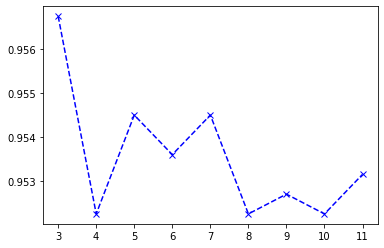

In [11]:
##PLOTTING graph
plt.plot(range(3,12),accuracy_vals,color='blue',marker ='x',linestyle="dashed")


# Accuracy and choosen k

In [12]:
print("MAX_ACCURACY IS :",max_accuracy, 'at k-val:', k_v)

MAX_ACCURACY IS : 0.9567567567567568 at k-val: 3


## Part-2
Vectorize tweets based on the text. More details and reference links can be checked on the Tasks list in the start of the notebook

In [9]:
##Important libraries
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/lokesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
def tweet_vectoriser(df2):
    
    results =[clean_tweet(tw) for tw in df2]
    ##vectroise
    from sklearn.feature_extraction.text import  TfidfVectorizer
    cv = TfidfVectorizer()
    x = cv.fit_transform(results).toarray()
    x = pd.DataFrame(x)
#     x.head(2)
    
    #1. standard
    from sklearn.preprocessing import StandardScaler
    scalar = StandardScaler()
    scalar.fit(x)
    scaled_data = scalar.transform(x)
    # scaled_data

    #using svd
    from sklearn.datasets import load_digits
    from sklearn.decomposition import TruncatedSVD
    svd = TruncatedSVD(n_components=20)
    X_svd = svd.fit_transform(x)
    return X_svd
    
#   """
#   Funtion to return a matrix of dimensions (number of tweets, number of features extracted per tweet)
#   Following are the steps for be followed:
#     1. Remove links, tags and hashtags from each tweet.
#     2. Apply TF-IDF on the tweets to extract a vector. 
#     3. Perform dimensionality reduction on the obtained vector. 
#   Input parameters to this funcion are to be chosen as per requirement (Example: Array of tweets) 
#   """

def clean_tweet(tweet):
    #Task 1 : to lower
    temp = tweet.lower()
    
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    #Task 2 : all in once
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    url_regex_exp = r"(https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*))"
    temp = re.sub(url_regex_exp," ", temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    all_stopwords = stopwords.words('english')
    temp = [w for w in temp if not w in all_stopwords]
    temp = " ".join(word for word in temp)
    return temp
  # your code here

In [11]:
df2 = pd.read_csv("Tweets.csv")
df2 = df2['text']
results = tweet_vectoriser(df2)

Perform KNN using the vector obtained from tweet_vectoriser() function. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

## SPLIT

In [12]:
x_train,x_test, y_train,y_test = train_test_split(results,tf,test_size=0.2)

In [15]:
accuracy_vals1 = []
max_accuracy = 0
k_v = 1000
for i in range(3,12):
    y_predicted = KNN_new(x_train,y_train,x_test,k_val=i)
    a = accuracy_score(y_test,y_predicted)
    if max_accuracy < a:
        k_v = i
        max_accuracy = a
    accuracy_vals1.append(a)
    print("for",i,'accuracy_score =', accuracy_score(y_test,y_predicted))

for 3 accuracy_score = 0.9202702702702703
for 4 accuracy_score = 0.9256756756756757
for 5 accuracy_score = 0.9238738738738739
for 6 accuracy_score = 0.9243243243243243
for 7 accuracy_score = 0.9234234234234234
for 8 accuracy_score = 0.9247747747747748
for 9 accuracy_score = 0.9238738738738739
for 10 accuracy_score = 0.9238738738738739
for 11 accuracy_score = 0.9243243243243243


MAX_ACCURACY IS : 0.9256756756756757 at k-val: 4


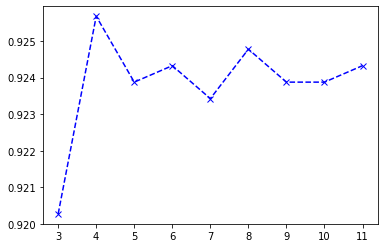

In [16]:
plt.plot(range(3,12),accuracy_vals1,color='blue',marker ='x',linestyle="dashed")
print("MAX_ACCURACY IS :",max_accuracy, 'at k-val:', k_v)


## Part-3
### Subpart-1

Combine both the vectors obtained from the tweet_vectoriser() and get_features()

In [17]:
# your code here
data = pd.read_csv("Tweets.csv")
df1 = pd.DataFrame(get_features(data))
df2 = df['text']
df2 = pd.DataFrame(tweet_vectoriser(df2))
print(df1.shape)
print(df2.shape)
result = pd.concat([df2, df1], axis=1).reindex(df2.index)
 

(11099, 5)
(11099, 20)


In [18]:
result[:5]

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,retweet_count,user_followers_count,user_friends_count,user_favourites_count,user_statuses_count
0,0.046901,-0.018261,-0.005212,-0.002438,-0.000563,-0.005044,-0.000694,-0.001464,-0.007788,-0.007693,...,-0.013916,0.000662,-0.015275,0.001810,0.014929,0.000273,0.000008,0.000517,0.051868,0.010991
1,0.432844,0.888853,0.054991,0.014318,-0.002121,0.017204,-0.003698,-0.076461,0.001508,-0.012319,...,0.015924,0.003517,0.007475,0.001141,0.003739,0.014266,0.000039,0.000749,0.010454,0.030639
2,0.086341,-0.035502,-0.006551,0.066539,0.000123,-0.024079,-0.026981,0.013920,-0.016347,-0.062274,...,-0.083146,-0.007410,-0.045442,-0.042666,0.072658,0.009052,0.000013,0.000482,0.008533,0.000607
3,0.080267,-0.031005,-0.008529,-0.005618,-0.001101,-0.017788,-0.012571,-0.007955,0.007473,0.065812,...,0.015947,0.017574,0.004555,0.015717,-0.022308,0.000024,0.000120,0.004758,0.009424,0.000756
4,0.094399,-0.040458,-0.005175,-0.004417,0.000249,-0.043083,-0.055234,-0.022802,-0.043448,0.006401,...,0.027015,0.064329,-0.092503,-0.032756,0.312165,0.061167,0.000016,0.001415,0.009883,0.011762


Perform KNN using the vector obtained in the previous step. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

In [19]:
# your code here
x_train,x_test, y_train,y_test = train_test_split(result,tf,test_size=0.2)
accuracy_vals1 = []
max_accuracy = 0
k_v = 1000
for i in range(3,12):
    y_predicted = KNN_new(x_train,y_train,x_test,k_val=i)
    a = accuracy_score(y_test,y_predicted)
    if max_accuracy < a:
        k_v = i
        max_accuracy = a
    accuracy_vals1.append(a)
    print("for",i,'accuracy_score =', accuracy_score(y_test,y_predicted))

for 3 accuracy_score = 0.9387387387387387
for 4 accuracy_score = 0.9387387387387387
for 5 accuracy_score = 0.9405405405405406
for 6 accuracy_score = 0.936036036036036
for 7 accuracy_score = 0.9373873873873874
for 8 accuracy_score = 0.9364864864864865
for 9 accuracy_score = 0.9391891891891891
for 10 accuracy_score = 0.9369369369369369
for 11 accuracy_score = 0.9382882882882883
for 12 accuracy_score = 0.9391891891891891
for 13 accuracy_score = 0.94009009009009
for 14 accuracy_score = 0.936036036036036


MAX_ACCURACY IS : 0.9405405405405406 at k-val: 5


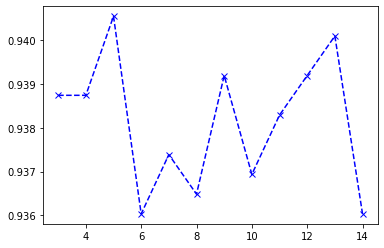

In [20]:
# your code here
plt.plot(range(3,15),accuracy_vals1,color='blue',marker ='x',linestyle="dashed")
print("MAX_ACCURACY IS :",max_accuracy, 'at k-val:', k_v)

### Subpart-2

Explain the differences between the accuracies obtained in each part above based on the features used.

Part1. columns used are :5
'retweet_count','user_followers_count', 'user_friends_count', 'user_favourites_count','user_statuses_count'

MAX_ACCURACY IS : 0.9567567567567568 at k-val: 3



Part2. column used  : text
TruncatedSVD is used here for dimensionality reduction to 20                                                          
MAX_ACCURACY IS : 0.9256756756756757 at k-val: 4



Part3. combined 20 columns from part 2 and 5columns from part1                                                       
MAX_ACCURACY IS : 0.9405405405405406 at k-val: 5

 